In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
from sklearn.preprocessing import Binarizer

In [7]:
df['income_binarized'] = np.where(df[' income'] == ' >50K', 1, 0)

In [8]:
df = df.drop(columns=[' race', ' native-country'])

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income,income_binarized
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,<=50K,0


In [10]:
features = [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' sex']
df[features] = df[features].apply(LabelEncoder().fit_transform)

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income,income_binarized
0,39,7,77516,9,13,4,1,1,1,2174,0,40,<=50K,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,<=50K,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,<=50K,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,<=50K,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,0,38,<=50K,0
32557,40,4,154374,11,9,2,7,0,1,0,0,40,>50K,1
32558,58,4,151910,11,9,6,1,4,0,0,0,40,<=50K,0
32559,22,4,201490,11,9,4,1,3,1,0,0,20,<=50K,0


In [12]:
df.isnull().sum()

age                 0
 workclass          0
 fnlwgt             0
 education          0
 education-num      0
 marital-status     0
 occupation         0
 relationship       0
 sex                0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 income             0
income_binarized    0
dtype: int64

In [13]:
X = df.drop([' income', 'income_binarized'], axis = 1)
Y = df['income_binarized']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [14]:
sc = StandardScaler(with_mean = False)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## SGD

In [32]:
import time
start_time = time.time()

model = SGDClassifier(loss='log_loss', alpha=0.01, max_iter=1000, random_state=42)
model.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.10892987251281738 seconds


In [16]:
def report(classifier):    
    y_pred = classifier.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, y_pred)
    conf_m = confusion_matrix(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)

    print(f"Accuracy: {accuracy}")

    print(f"Classification Report:")
    print(report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

Accuracy: 0.8241977583294948
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.72      0.45      0.55      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



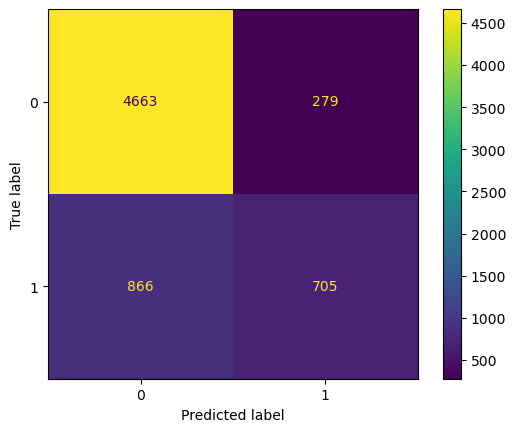

In [17]:
report(model)

## LightGBM

In [18]:
from lightgbm import LGBMClassifier 

In [19]:
modelgbm = LGBMClassifier(metric='auc') 
  
# Fit the model on the training data 
modelgbm.fit(X_train, Y_train) 
  
# Make predictions on the training and validation sets 
y_train = modelgbm.predict(X_train) 
y_val = modelgbm.predict(X_test) 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6270, number of negative: 19778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240709 -> initscore=-1.148794
[LightGBM] [Info] Start training from score -1.148794


In [20]:
import lightgbm as lgb 
  
train_data = lgb.Dataset(X_train, label=Y_train) 
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data) 
  
params = { 
    'objective': 'binary', 
    'metric': 'auc', 
    'boosting_type': 'gbdt', 
    'num_leaves': 31, 
    'learning_rate': 0.05, 
    'feature_fraction': 0.9, 
} 

In [21]:
num_round = 100

model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6270, number of negative: 19778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 12
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240709 -> initscore=-1.148794
[LightGBM] [Info] Start training from score -1.148794


In [22]:
from sklearn.metrics import roc_auc_score as ras 

print("Training ROC-AUC: ", ras(Y_train, y_train)) 
print("Validation ROC-AUC: ", ras(Y_test, y_val)) 

Training ROC-AUC:  0.8181996476680629
Validation ROC-AUC:  0.8124654006848636


Accuracy: 0.7587901120835252
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4942
           1       0.00      0.00      0.00      1571

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.58      0.76      0.65      6513



C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


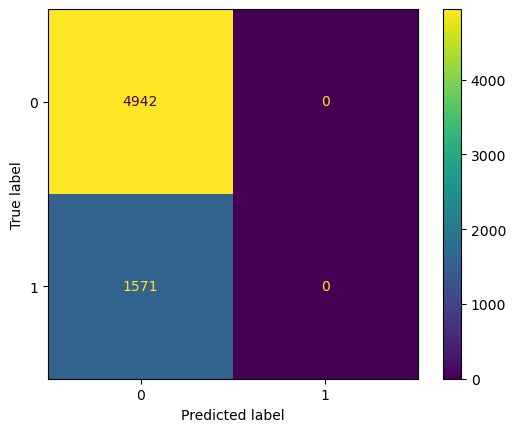

In [23]:
report(modelgbm)

## LogReg

In [24]:
start_time = time.time()
model_regr = LogisticRegression(random_state=42)
model_regr.fit(X_train_scaled, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 0.19187426567077637 seconds


Accuracy: 0.8252725318593582
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



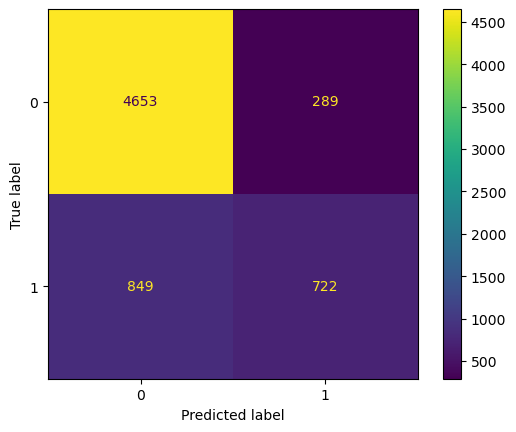

In [25]:
report(model_regr)

## Classification Visualization

In [26]:
from sklearn.manifold import TSNE

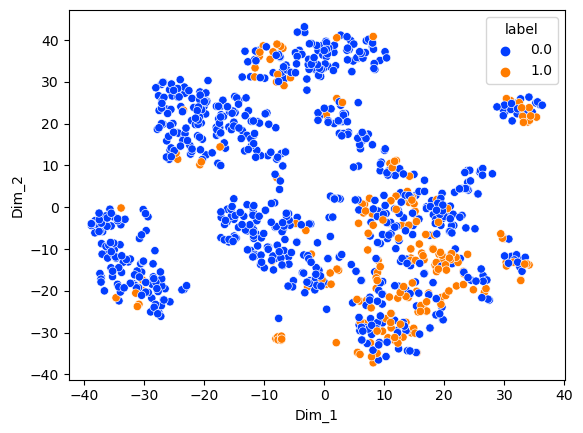

In [27]:
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = Y_train.iloc[0:1000]

# Применение t-SNE
model_tsne = TSNE(n_components=2, random_state=0, init='random')
tsne_data = model_tsne.fit_transform(data_1000)

# Создание нового DataFrame для визуализации
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Визуализация результатов t-SNE
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

In [28]:
def TSNE_plot(model_clf, text):
    model_svm_linear = model_clf
    model_svm_linear.fit(data_1000, labels_1000)

    # Get the model's predictions or transformed features (replace with your features)
    transformed_data = model_svm_linear.predict_proba(data_1000)

    # Configure and fit t-SNE with init="random"
    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    # Create a new DataFrame for the result
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    # Plotting the result of t-SNE
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(text)
    plt.legend()
    plt.show()

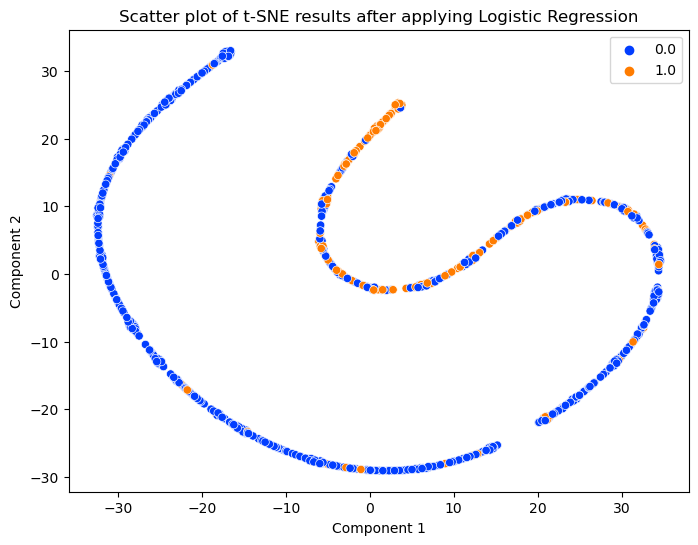

In [29]:
TSNE_plot(model_regr, "Scatter plot of t-SNE results after applying Logistic Regression")

[LightGBM] [Info] Number of positive: 217, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217000 -> initscore=-1.283235
[LightGBM] [Info] Start training from score -1.283235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


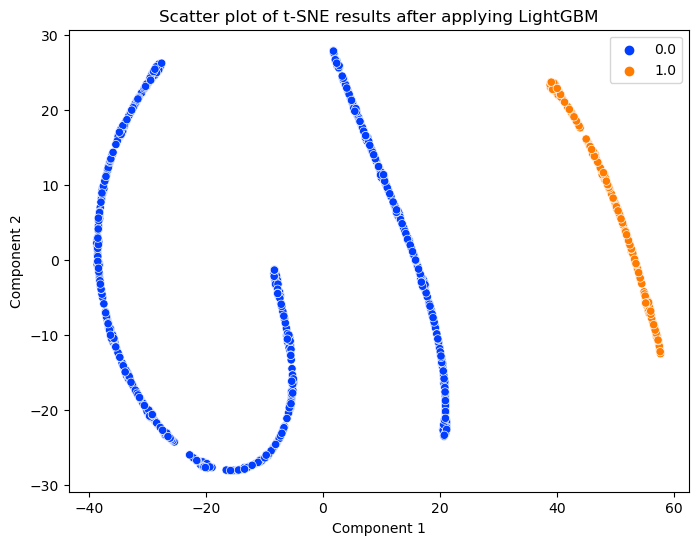

In [30]:
TSNE_plot(modelgbm, "Scatter plot of t-SNE results after applying LightGBM")

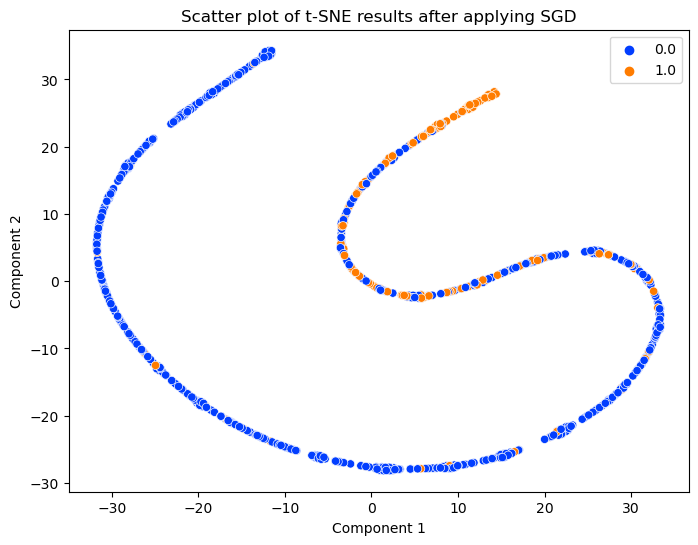

In [33]:
TSNE_plot(model, "Scatter plot of t-SNE results after applying SGD")